# Introdução a testes estatísticos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Bibliotecas básicas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Conjunto de dados TMDB

### Carregando os dados

In [3]:
tmdb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura/tmdb_5000_movies.csv')
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


### Resumo dos dados

In [4]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Visualizando a distribuição

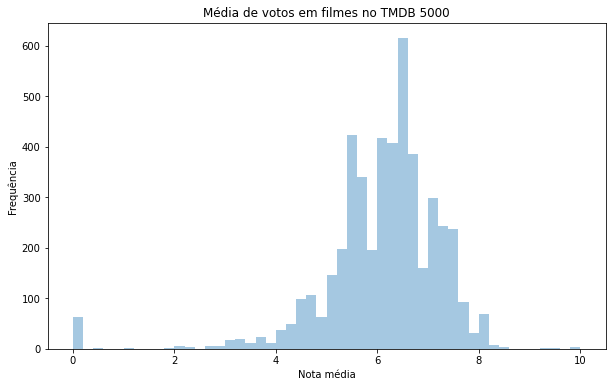

In [5]:
plt.figure(figsize=[10, 6])
ax = sns.distplot(tmdb['vote_average'], norm_hist=False, kde=False)
ax.set(xlabel='Nota média', ylabel='Frequência')
ax.set_title('Média de votos em filmes no TMDB 5000')
plt.show()

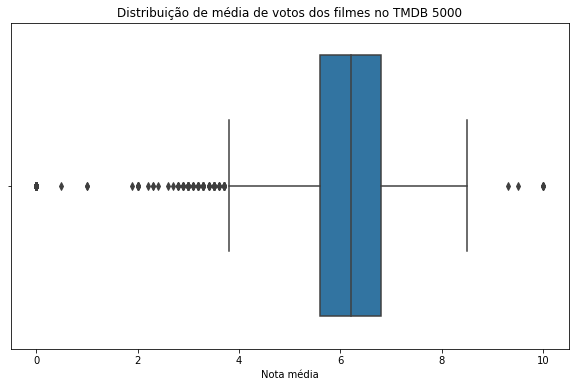

In [6]:
plt.figure(figsize=[10, 6])
ax = sns.boxplot(tmdb['vote_average'])
ax.set(xlabel='Nota média')
ax.set_title('Distribuição de média de votos dos filmes no TMDB 5000')
plt.show()

### Tirando valores discrepantes

Alguns filmes tiveram poucos ou nenhum voto. Decidimos que esses filmes não devem pertencer a nossa análise.

In [7]:
tmdb_com_mais_de_10_votos = tmdb.query('vote_count>=10')

In [8]:
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


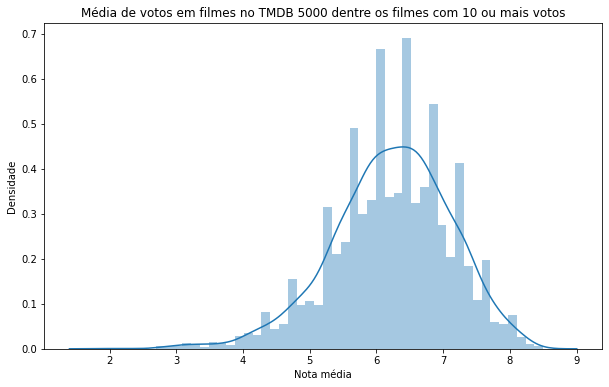

In [9]:
plt.figure(figsize=[10, 6])
ax = sns.distplot(tmdb_com_mais_de_10_votos['vote_average'])
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')
plt.show()

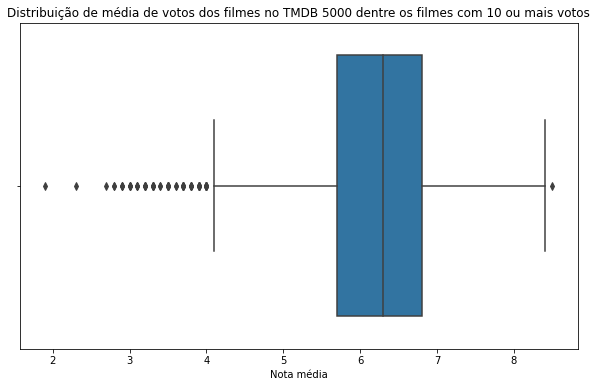

In [10]:
plt.figure(figsize=[10, 6])
ax = sns.boxplot(tmdb_com_mais_de_10_votos['vote_average'])
ax.set(xlabel='Nota média')
ax.set_title('Distribuição de média de votos dos filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')
plt.show()

### Distribuição acumulada das notas dos filmes

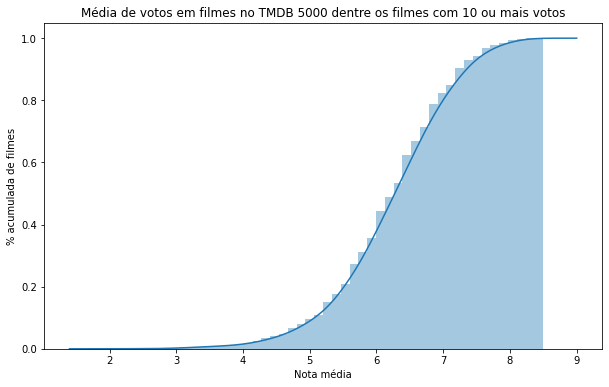

In [11]:
plt.figure(figsize=[10, 6])
ax = sns.distplot(tmdb_com_mais_de_10_votos['vote_average'], hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
ax.set(xlabel='Nota média', ylabel='% acumulada de filmes')
ax.set_title('Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')
plt.show()

## Conjunto de dados Movielens

### Carregando os dados

In [12]:
notas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Calculando a média das nota dos filmes

In [13]:
nota_media_por_filme = notas.groupby('movieId').mean()['rating']
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

### Visualizando a distribuição

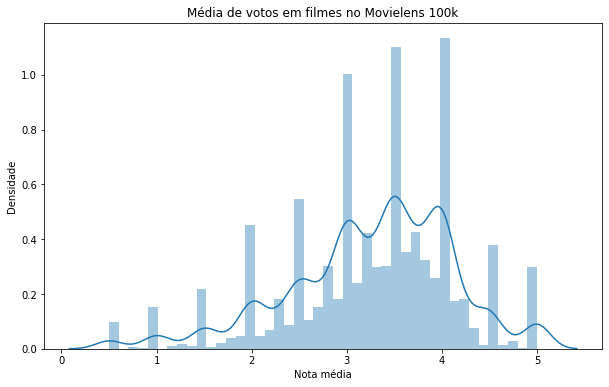

In [14]:
plt.figure(figsize=[10, 6])
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no Movielens 100k')
plt.show()

### Valores discrepantes

In [15]:
quantidade_de_votos_por_filme = notas.groupby('movieId').count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query('rating >= 10').index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [16]:
nota_media_dos_filme_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos]
nota_media_dos_filme_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

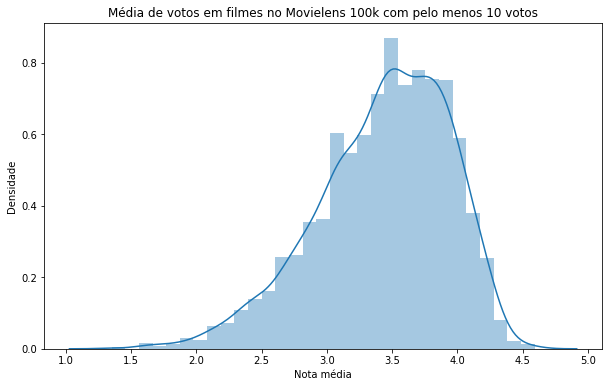

In [17]:
plt.figure(figsize=[10, 6])
ax = sns.distplot(nota_media_dos_filme_com_pelo_menos_10_votos.values)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no Movielens 100k com pelo menos 10 votos')
plt.show()

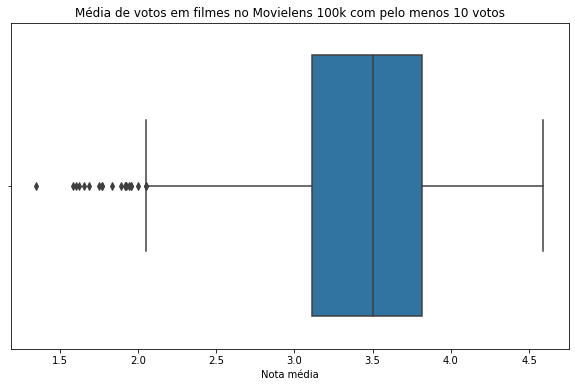

In [18]:
plt.figure(figsize=[10, 6])
ax = sns.boxplot(nota_media_dos_filme_com_pelo_menos_10_votos.values)
ax.set(xlabel='Nota média')
ax.set_title('Média de votos em filmes no Movielens 100k com pelo menos 10 votos')
plt.show()

### Distribuição acumulada das notas dos filmes

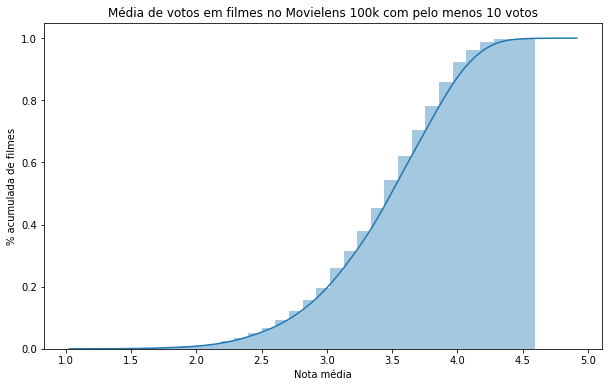

In [19]:
plt.figure(figsize=[10, 6])
ax = sns.distplot(nota_media_dos_filme_com_pelo_menos_10_votos.values, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
ax.set(xlabel='Nota média', ylabel='% acumulada de filmes')
ax.set_title('Média de votos em filmes no Movielens 100k com pelo menos 10 votos')
plt.show()